# Deep Neural Networks training on CIFAR-10

In [63]:
# Imports and Preparation
import numpy as np
import os
import pickle
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc  # Added roc_curve and auc
from tensorflow.keras.optimizers.legacy import SGD
import tensorflow as tf
import matplotlib.pyplot as plt  # Added for plotting

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

def load_batch_file(batch_filename):
    filepath = os.path.join('cifar-10-batches-py', batch_filename)
    unpickled = unpickle(filepath)
    return unpickled

# Load data
train_batches = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
train_x = []
train_y = []
for batch in train_batches:
    batch_data = load_batch_file(batch)
    train_x.append(batch_data['data'])
    train_y.append(np_utils.to_categorical(batch_data['labels'], 10))
train_x = np.concatenate(train_x).astype('float32') / 255.0
train_y = np.concatenate(train_y)

# Split data into training and validation
indices = np.arange(train_x.shape[0])
np.random.shuffle(indices)
num_validation_samples = int(0.1 * train_x.shape[0])

val_x = train_x[indices[:num_validation_samples]]
val_y = train_y[indices[:num_validation_samples]]
train_x = train_x[indices[num_validation_samples:]]
train_y = train_y[indices[num_validation_samples:]]

# Define the DNN model
model = Sequential([
    Dense(1000, input_shape=(train_x.shape[1],), activation='relu'),
    Dense(1000, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(train_x, train_y, epochs=50, batch_size=32, validation_data=(val_x, val_y))


Epoch 1/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8563 - accuracy: 0.3276 - val_loss: 1.6962 - val_accuracy: 0.3920
Epoch 2/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6835 - accuracy: 0.3955 - val_loss: 1.6376 - val_accuracy: 0.4118
Epoch 3/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6016 - accuracy: 0.4227 - val_loss: 1.6490 - val_accuracy: 0.3988
Epoch 4/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5487 - accuracy: 0.4447 - val_loss: 1.5913 - val_accuracy: 0.4210
Epoch 5/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5008 - accuracy: 0.4606 - val_loss: 1.5448 - val_accuracy: 0.4470
Epoch 6/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4615 - accuracy: 0.4767 - val_loss: 1.5165 - val_accuracy: 0.4556
Epoch 7/50
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4274 - accuracy: 0.4883 - val_loss: 1.5050 - val_accuracy:

157/157 [==============================] - 0s 2ms/step
F1 Score: 0.5086777985197075
Final Validation Accuracy: 0.5055999755859375
Final Validation Loss: 2.6903235912323
Average AUC Score: 0.86


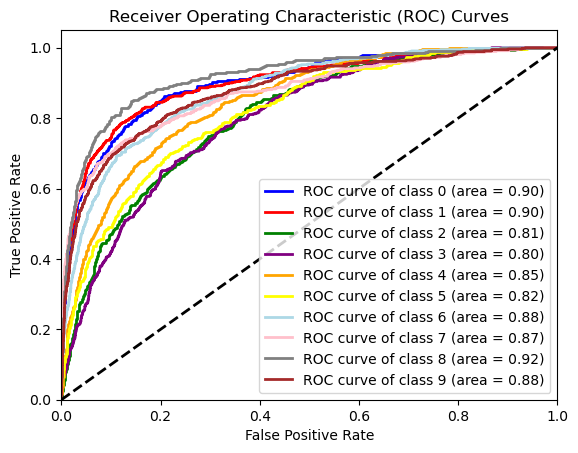

In [72]:
# Evaluate the model
val_pred_proba = model.predict(val_x, batch_size=32)  # Get probability instead of classes for ROC
val_true_classes = np.argmax(val_y, axis=1)

# Calculate F1 Score and AUC
f1 = f1_score(val_true_classes, np.argmax(val_pred_proba, axis=1), average='weighted')
print(f"F1 Score: {f1}")
print(f"Final Validation Accuracy: {final_accuracy}")
print(f"Final Validation Loss: {final_loss}")

# Calculate ROC curves and AUC values for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = 10
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(val_y[:, i], val_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate ROC curves and AUC values for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = 10
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(val_y[:, i], val_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate and print average AUC
avg_auc = np.mean(list(roc_auc.values()))
print(f"Average AUC Score: {avg_auc:.2f}")
    
    
# Plot ROC curves for all classes
plt.figure()
colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'lightblue', 'pink', 'gray', 'brown']
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Final accuracy and loss on validation set
final_accuracy = history.history['val_accuracy'][-1]
final_loss = history.history['val_loss'][-1]


157/157 [==============================] - 0s 2ms/step


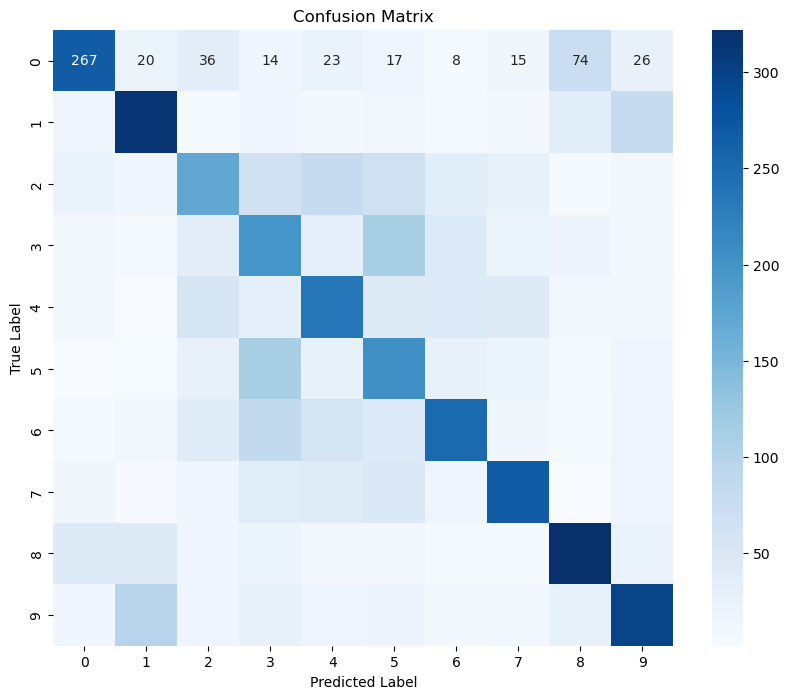

In [74]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the validation set
val_predictions = model.predict(val_x)
val_predictions_classes = np.argmax(val_predictions, axis=1)
val_true_classes = np.argmax(val_y, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(val_true_classes, val_predictions_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Evaluation of the DNN Model for CIFAR-10 Dataset

## Model Performance Overview

### 1. Accuracy
- **Validation Accuracy**: 50.56%
  - The accuracy indicates a moderate level of correctness, with the model correctly classifying about half of the test samples. This level suggests the model may struggle with the dataset's complexity or diversity.

### 2. F1 Score
- **F1 Score**: 50.87%
  - The F1 Score, which balances precision and recall, also reflects moderate performance. This score is particularly important as it indicates the model's balanced capacity in precision and recall, which is crucial for datasets with multiple classes.

### 3. AUC Score
- **Average AUC**: 86%
  - The AUC score is relatively high, indicating good model separability. This suggests that the model has a strong capability to distinguish between classes, despite the lower accuracy and F1 score.

### 4. ROC Curves
- **Observation**: 
    - The AUC curves all lie above the dotted line
    - We can painfully beat the AUC numbers to determine the mod's performance between about 0.92 and 0.8.

## Key Insights and Recommendations

### Model Limitations
- The moderate accuracy and F1 Score suggest that while the model can differentiate between classes to a certain extent (as shown by the AUC), it may not be highly reliable in more precise classification tasks within this complex dataset.
  
### Possible Improvements
- **Architecture Adjustments**: Consider exploring more sophisticated architectures such as Convolutional Neural Networks (CNNs), which are typically more suited for image classification tasks.
- **Hyperparameter Tuning**: Refinement of learning rates, epoch counts, and layer configurations could help enhance model training and performance.
- **Data Handling**: Implementing data augmentation techniques might help the model generalize better from the training data by simulating a more diverse set of training examples.

### Conclusion

The current DNN model shows promising areas highlighted by the AUC score but is limited by an overall moderate performance in accuracy and F1 Score. Enhancements in model architecture, training procedures, and data handling could potentially uplift its performance significantly, making it more robust and reliable for classifying images in the CIFAR-10 dataset.
